## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [180]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [181]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [182]:
# Use the head (and/or tail) function to confirm that the data was imported properly

bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [183]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [184]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [185]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp.dropna()

bitstamp.loc[:, "Open"] = bitstamp.loc[:, "Open"].fillna(0)
bitstamp.loc[:, "High"] = bitstamp.loc[:, "High"].fillna(0)
bitstamp.loc[:, "Low"] = bitstamp.loc[:, "Low"].fillna(0)
bitstamp.loc[:, "BTC Volume"] = bitstamp.loc[:, "BTC Volume"].fillna(0)
bitstamp.loc[:, "USD Volume"] = bitstamp.loc[:, "USD Volume"].fillna(0)
bitstamp.loc[:, "Weighted Price"] = bitstamp.loc[:, "Weighted Price"].fillna(0)

bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [186]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp
bitstamp.dtypes

C:\Users\kashb\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [187]:
# Convert the Close data type to a float
# YOUR CODE HERE

bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [188]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp = bitstamp.drop_duplicates()

bitstamp.duplicated().sum()



0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [189]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE

coinbase.dropna()

coinbase.loc[:, "Open"] = coinbase.loc[:, "Open"].fillna(0)
coinbase.loc[:, "High"] = coinbase.loc[:, "High"].fillna(0)
coinbase.loc[:, "Low"] = coinbase.loc[:, "Low"].fillna(0)
coinbase.loc[:, "BTC Volume"] = coinbase.loc[:, "BTC Volume"].fillna(0)
coinbase.loc[:, "USD Volume"] = coinbase.loc[:, "USD Volume"].fillna(0)
coinbase.loc[:, "Weighted Price"] = coinbase.loc[:, "Weighted Price"].fillna(0)

coinbase.isnull().sum()

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase
coinbase.dtypes

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

coinbase = coinbase.drop_duplicates()

coinbase.duplicated().sum()

C:\Users\kashb\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [190]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]

bitstamp_sliced.head()

# Review the first five rows of the DataFrame
# YOUR CODE HERE

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [191]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
# YOUR CODE HERE

coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [192]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()



count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [193]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE

coinbase_sliced.describe()


count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

Text(0, 0.5, 'Price')

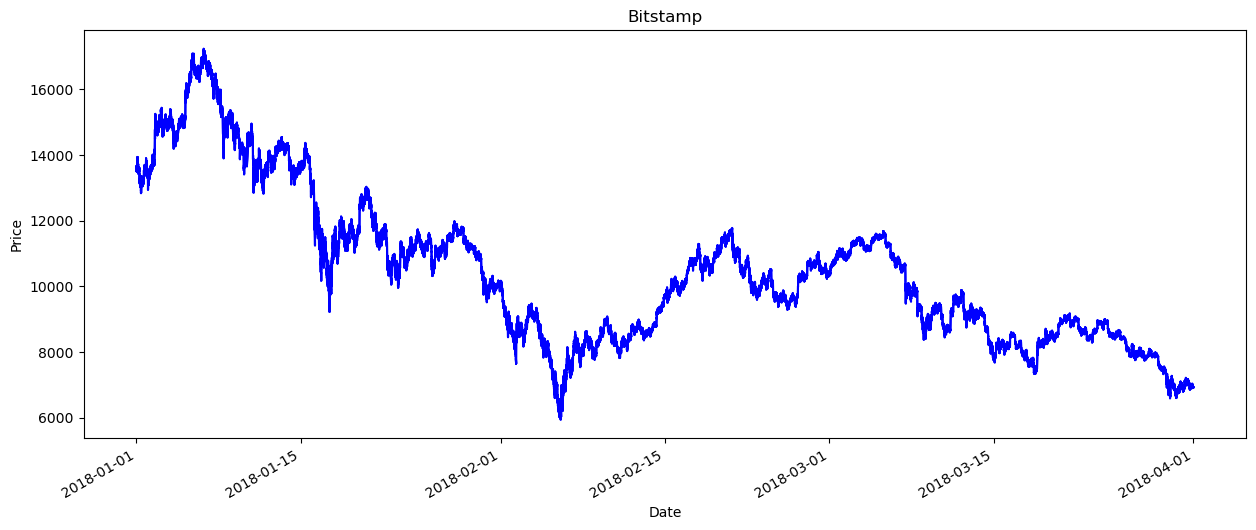

In [200]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

bitstamp_sliced.plot(figsize=(15, 6), title="Bitstamp", color="blue")

bitstamp_sliced_plot= bitstamp_sliced.plot(figsize=(15, 6), title="Bitstamp", color="blue")
bitstamp_sliced_plot.set_xlabel("Date")
bitstamp_sliced_plot.set_ylabel("Price")


Text(0, 0.5, 'Price')

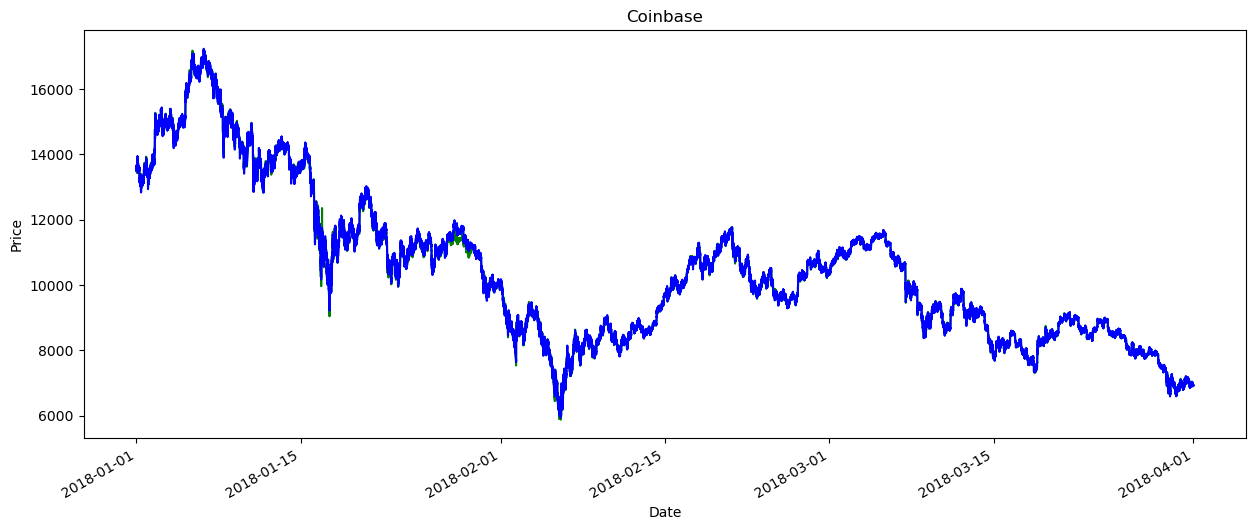

In [201]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

coinbase_sliced.plot(figsize=(15, 6), title="Coinbase", color="green")

coinbase_sliced_plot= bitstamp_sliced.plot(figsize=(15, 6), title="Coinbase", color="blue")
coinbase_sliced_plot.set_xlabel("Date")
coinbase_sliced_plot.set_ylabel("Price")

Text(0.5, 0, 'Date')

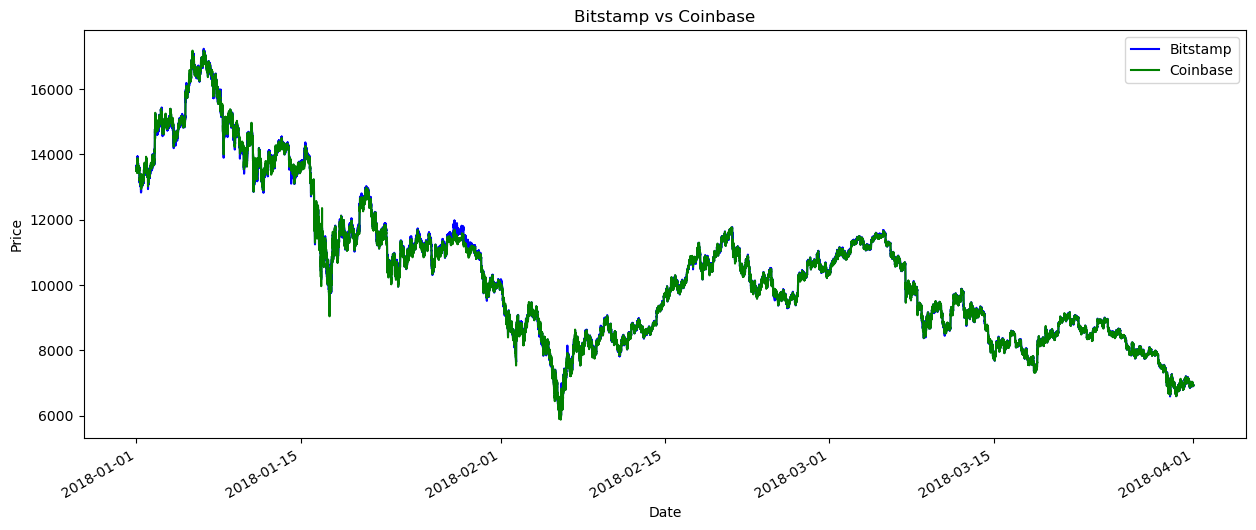

In [205]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp_sliced.plot(legend=True, figsize=(15, 6), title="Bitstamp vs Coinbase", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.plot(legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Date")


Text(0.5, 0, 'Date')

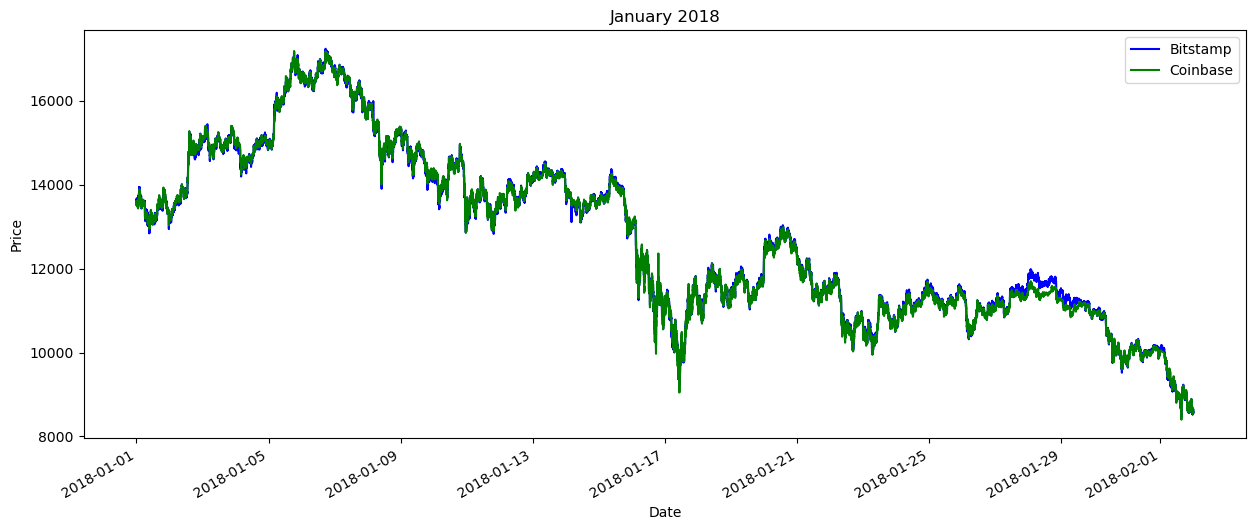

In [207]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp_sliced.loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 6), title="January 2018", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Date")

Text(0.5, 0, 'Date')

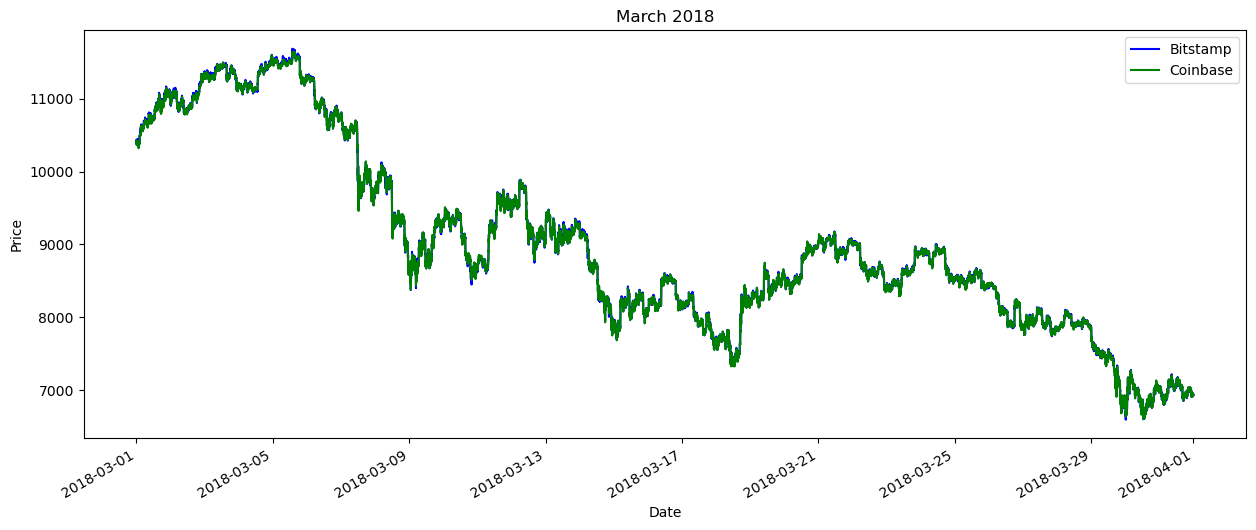

In [208]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE

bitstamp_sliced.loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 6), title="March 2018", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Date")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

The degree of spread has lessened somewhat over time - the closing prices for Coinbase and Bitstamp seem to be converging as time progressed.


### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

Text(0.5, 0, 'Timestamp')

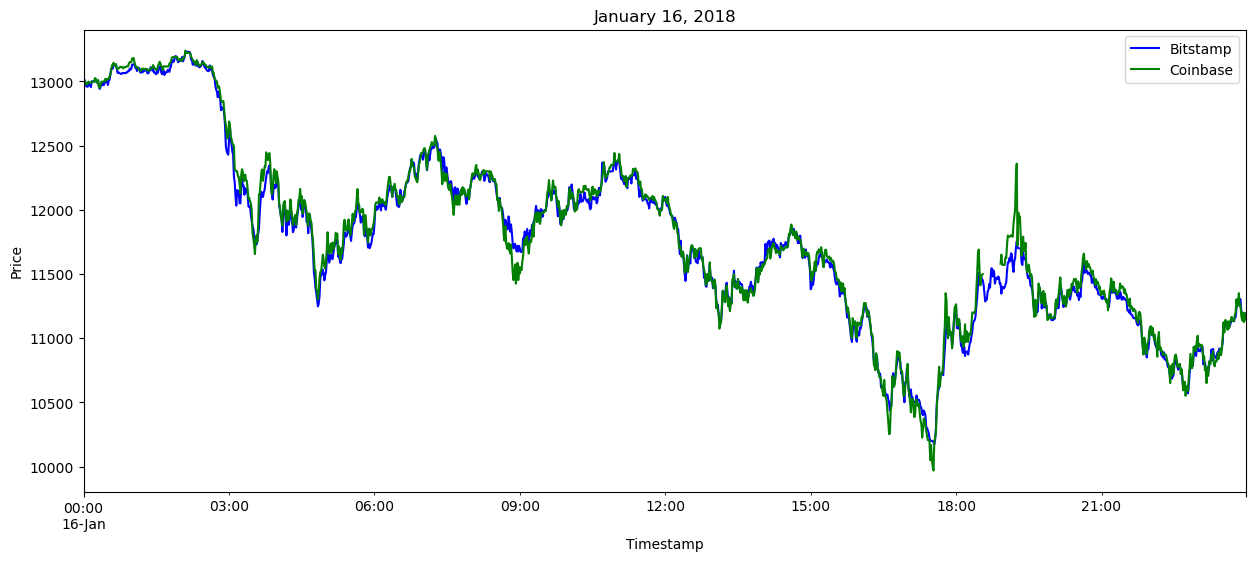

In [210]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced.loc['2018-01-16'].plot(
    legend=True, figsize=(15, 6), title="January 16, 2018", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.loc['2018-01-16'].plot(
    legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Timestamp")


In [216]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

Text(0, 0.5, 'Spread')

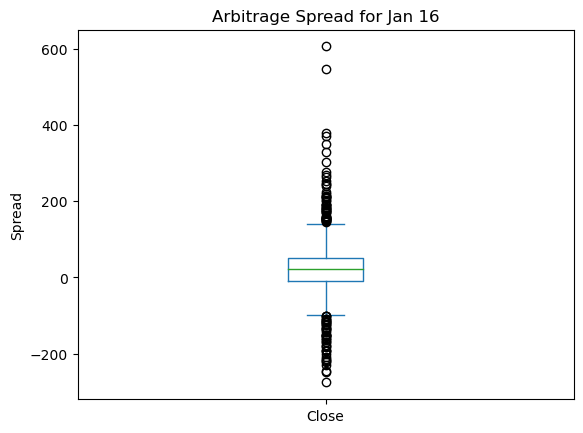

In [217]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_early.plot(title="Arbitrage Spread for Jan 16",kind='box').set_ylabel("Spread")


Text(0.5, 0, 'Timestamp')

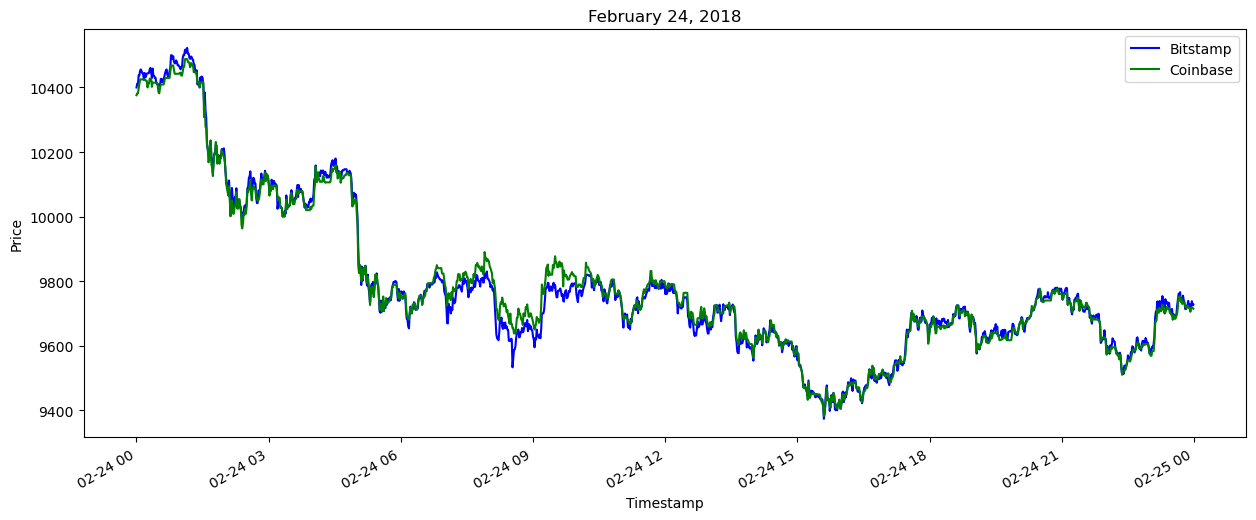

In [218]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced.loc['2018-02-24'].plot(
    legend=True, figsize=(15, 6), title="February 24, 2018", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.loc['2018-02-24'].plot(
    legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Timestamp")


In [219]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']

# Generate summary statistics 
# YOUR CODE HERE

arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

Text(0, 0.5, 'Spread')

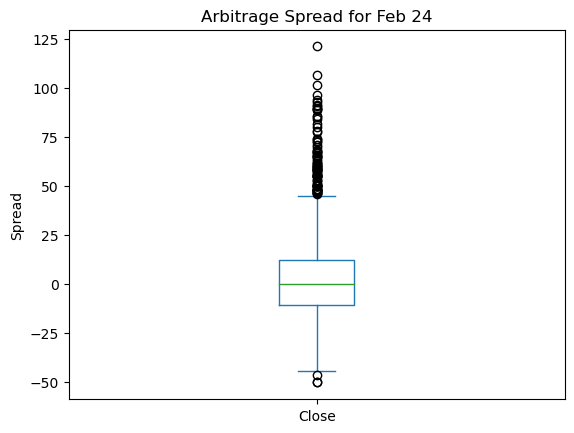

In [220]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_middle.plot(title="Arbitrage Spread for Feb 24",kind='box').set_ylabel("Spread")

Text(0.5, 0, 'Timestamp')

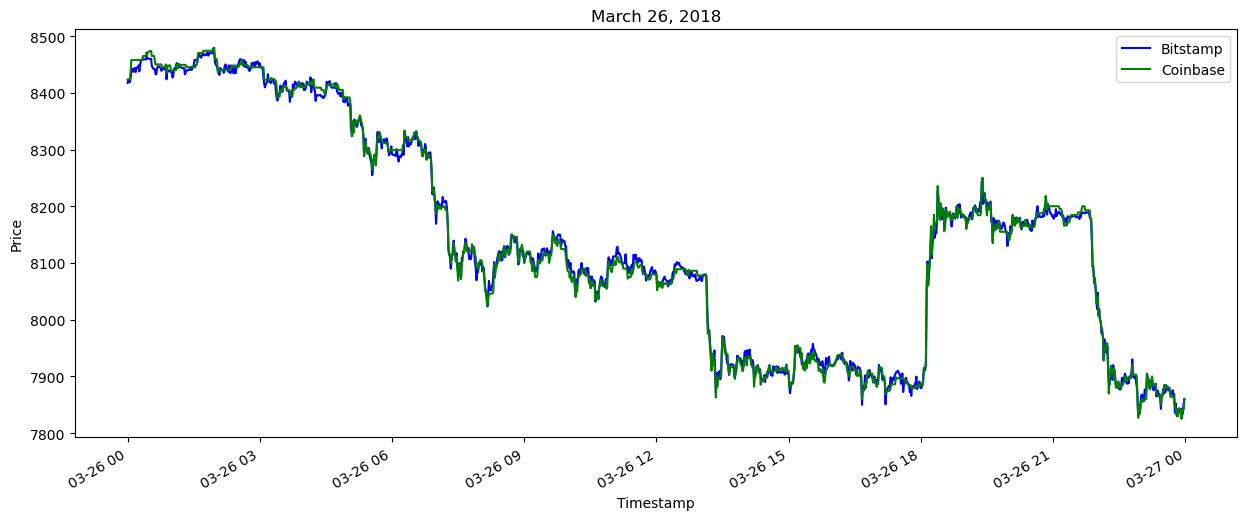

In [221]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp_sliced.loc['2018-03-26'].plot(
    legend=True, figsize=(15, 6), title="March 26, 2018", color="blue", label="Bitstamp").set_ylabel("Price")
coinbase_sliced.loc['2018-03-26'].plot(
    legend=True, figsize=(15, 6), color="green", label="Coinbase").set_xlabel("Timestamp")


In [222]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-26'] - bitstamp_sliced.loc['2018-03-26']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE

arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

Text(0, 0.5, 'Spread')

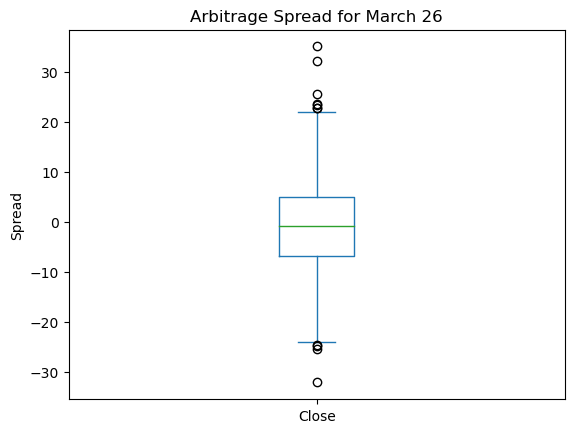

In [223]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_late.plot(title="Arbitrage Spread for March 26",kind='box').set_ylabel("Spread")


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [224]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']
arbitrage_spread_late = coinbase_sliced.loc['2018-03-26'] - bitstamp_sliced.loc['2018-03-26']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

print(arbitrage_spread_early[arbitrage_spread_early>0].describe())

print(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())

print(arbitrage_spread_late[arbitrage_spread_late>0].describe())


count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64
count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64
count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [225]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-16']

spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced.loc['2018-02-24']

spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-26']

# Review the spread return DataFrame

print(spread_return_early)

print(spread_return_middle)

print(spread_return_late)

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
                         ...   
2018-01-16 23:55:00    0.000546
2018-01-16 23:56:00         NaN
2018-01-16 23:57:00    0.002153
2018-01-16 23:58:00         NaN
2018-01-16 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64
Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
                       ..
2018-02-24 23:55:00   NaN
2018-02-24 23:56:00   NaN
2018-02-24 23:57:00   NaN
2018-02-24 23:58:00   NaN
2018-02-24 23:59:00   NaN
Name: Close, Length: 1437, dtype: float64
Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
                         ...   
2018-03-26 23:55:00         NaN
2018-03-26 23:56:00    0

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [226]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early = spread_return_early[spread_return_early > .01]

profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE

print(profitable_trades_early.head())

print(profitable_trades_middle.head())

print(profitable_trades_late.head())

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64
Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64
Series([], Name: Close, dtype: float64)


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [228]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

print(profitable_trades_early.describe())

print(profitable_trades_middle.describe())
      
print(profitable_trades_late.describe())




count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64
count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [229]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_early = profitable_trades_early* bitstamp_sliced.loc['2018-01-16']
profit_early

profit_middle = profitable_trades_middle* bitstamp_sliced.loc['2018-02-24']
profit_middle

profit_late = profitable_trades_late* bitstamp_sliced.loc['2018-03-26']
profit_late

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

profit_per_trade_middle = profit_middle.dropna()

profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame

print(profit_per_trade_early)

print(profit_per_trade_middle)

print(profit_per_trade_late)

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64
Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64
Series([], Name: Close, dtype: float64)


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [230]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

print(profit_per_trade_early.describe())

print(profit_per_trade_middle.describe())

print(profit_per_trade_late.describe())

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64
count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Text(0, 0.5, 'Profit')
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


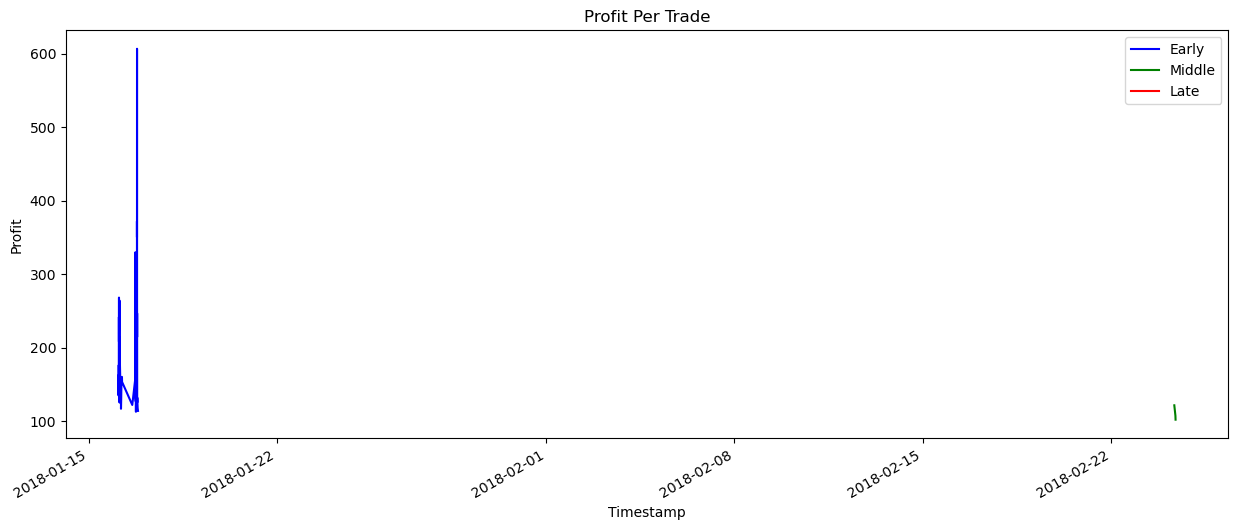

In [235]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

print(profit_per_trade_early.plot(
    legend=True, figsize=(15, 6), title="Profit Per Trade", color="blue", label="Early").set_ylabel("Profit"))

print(profit_per_trade_middle.plot(
    legend=True, figsize=(15, 6), color="green", label="Middle"))

print(profit_per_trade_late.plot(
    legend=True, figsize=(15, 6), color="red", label="Late"))


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [236]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

profit_sum_early = profit_per_trade_early.sum()
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_late = profit_per_trade_late.sum()


print(profit_sum_early)

print(profit_sum_middle)

print(profit_sum_late)


14147.169999999998
330.0699999999997
0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [237]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

print(cumulative_profit_early)

cumulative_profit_middle = profit_per_trade_middle.cumsum()

print(cumulative_profit_middle)

cumulative_profit_late = profit_per_trade_late.cumsum()

print(cumulative_profit_late)

Timestamp
2018-01-16 02:56:00      162.01
2018-01-16 02:57:00      297.01
2018-01-16 02:59:00      473.14
2018-01-16 03:00:00      607.15
2018-01-16 03:06:00      848.69
                         ...   
2018-01-16 19:23:00    13660.06
2018-01-16 19:26:00    13791.84
2018-01-16 19:38:00    13915.85
2018-01-16 19:48:00    14033.48
2018-01-16 20:07:00    14147.17
Name: Close, Length: 73, dtype: float64
Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    228.32
2018-02-24 09:39:00    330.07
Name: Close, dtype: float64
Series([], Name: Close, dtype: float64)


Text(0, 0.5, 'Profit')
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


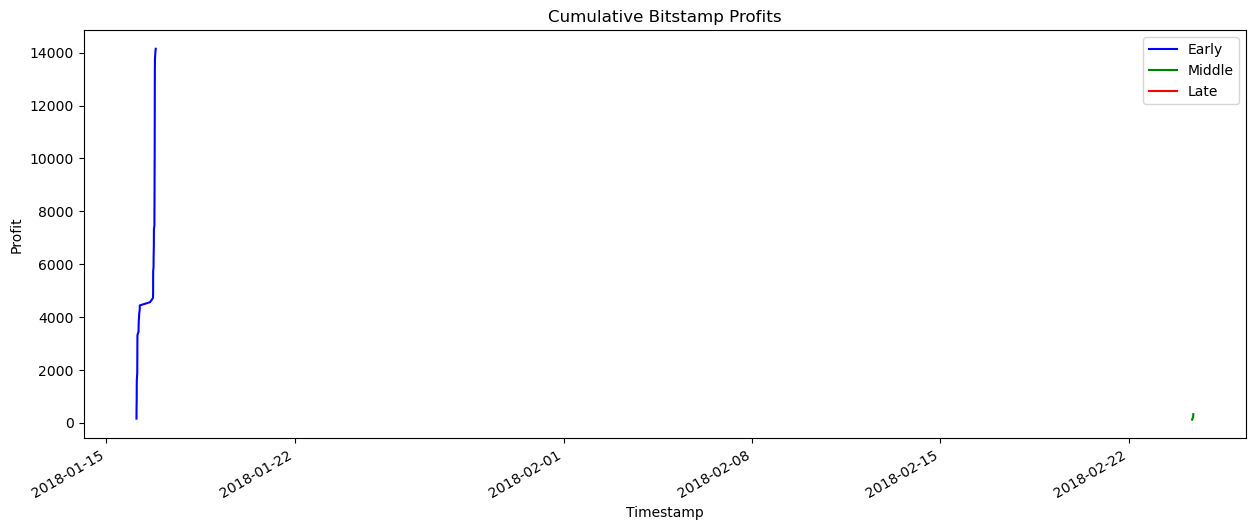

In [239]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame

print(cumulative_profit_early.plot(
    legend=True, figsize=(15, 6), title="Cumulative Bitstamp Profits", color="blue", label="Early").set_ylabel("Profit"))

print(cumulative_profit_middle.plot(
    legend=True, figsize=(15, 6), color="green", label="Middle"))

print(cumulative_profit_late.plot(
    legend=True, figsize=(15, 6), color="red", label="Late"))

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:**

There were more opportunities for arbitrage between Bitstamp and Coinbase earlier in the year; as time had progressed through the year of 2018, the spread had graudally decrease. This is highlighted in the summary statistics with the number of times trades with positive returns on Jan 16th (73) compared to Feb 24th (3) and March 26th (0). The mean positive spread return in this dataframe on Jan 16th was 1.67% compared 1.13% for Feb 24th and 0% for March 26th. The visualisation from cumulative profits plot also supports this idea: cumulative profits had reached 14,147.17 by the end of the day on Jan 16th; as there were fewer arbitrage opportunities on Feb 26th, cumulative profits for the day had reached only 330.07.